- Introdução

Esta documento tem como objetivo apresentar a analise de dados de um arquivo com 891 registros disponibilizados pela Udacity. Esta analise não é conclusiva e faz parte do meu estudo em data science. O arquivo contem informações de alguns dos passageiros a bordo do navio Titanic. A analise será feita no escopo de dados e quantidades do arquivo.

Com a analise deste aquivo pretendo responder algumas perguntas iniciais que surgiram ao visualizar o dicionário de dados presente no kaggle:

    1. Quantas passageiros morreram.
    2. Existiu alguma relação de sobrevivência com o sexo do passageiro.
    3. A classe do passageiro influenciou na sobrevivência?
    4. Qual a faixa de idade mais presente?
    5. A idade do passageiro influenciou na sobrevivência?

In [19]:
% matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definindo um layout.
sns.set(style="darkgrid");

#df_original = pd.read_csv('titanic-data-6.csv')

labels = ['id', 'sobrevivente', 'classe', 'nome', 'sexo', 'idade', 'qtd_irmao_conjuge',
          'qtd_pai_filho', 'bilhete', 'tarifa_passageiro', 'cabine', 'porto_embarque'];

df = pd.read_csv('titanic-data-6.csv', header=0, index_col='id', names=labels);

In [20]:
# Verificando quantidade de registros, quantidade de colunas, colunas que possui valores nulos e tipo de dado de cada coluna.
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
sobrevivente         891 non-null int64
classe               891 non-null int64
nome                 891 non-null object
sexo                 891 non-null object
idade                714 non-null float64
qtd_irmao_conjuge    891 non-null int64
qtd_pai_filho        891 non-null int64
bilhete              891 non-null object
tarifa_passageiro    891 non-null float64
cabine               204 non-null object
porto_embarque       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
# Verificando registros duplicados.
sum(df.duplicated())

0

In [4]:
# Verificando visualmente alguns registros.
df.head()

,sobrevivente,classe,nome,sexo,idade,qtd_irmao_conjuge,qtd_pai_filho,bilhete,tarifa_passageiro,cabine,porto_embarque
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
## Limpeza de dados ##

# Substituindo dados para uma melhor leitura. Origem das informações: https://www.kaggle.com/c/titanic/data

# Traduzindo o enum 0 e 1 para não e sim.
df['sobrevivente'] = df['sobrevivente'].replace([0, 1], ['não', 'sim']);

# Traduzindo o sexo do ingês para o português.
df['sexo'] = df['sexo'].replace(['male', 'female'], ['homem', 'mulher']);

# Traduzindo as letras que representam o porto de embarque.
df['porto_embarque'] = df['porto_embarque'].replace(['C', 'Q', 'S'], ['Cherbourg', 'Queenstown', 'Southampton']);

# Tratando os valores nulos não numéricos para facilitar a leitura de outras pessoas.
df["cabine"].fillna("não registrado", inplace = True);
df["porto_embarque"].fillna("não registrado", inplace = True);

# Preenchendo as idades nulas com a média da idade dos passageiros.
df['idade'] = df['idade'].fillna(df['idade'].mean());

In [6]:
df.head()

,sobrevivente,classe,nome,sexo,idade,qtd_irmao_conjuge,qtd_pai_filho,bilhete,tarifa_passageiro,cabine,porto_embarque
id,,,,,,,,,,,
1,não,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,não registrado,Southampton
2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,sim,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,não registrado,Southampton
4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,Southampton
5,não,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,não registrado,Southampton


In [7]:
# Exibindo algumas informações que podem gerar mais perguntas e ampliar a analise.
df.describe()

,classe,idade,qtd_irmao_conjuge,qtd_pai_filho,tarifa_passageiro
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Analise: Foi identificado o passageiro mais idoso possuía 80 anos de idade e que a média a bordo era em torno de 30 anos. Também foi identificado que a idade mínima é menor do que 1 ano, então o arquivo deve possuir dados de crianças a serem investigados. Também foi identificado que existem passageiros com tarifa zerada.

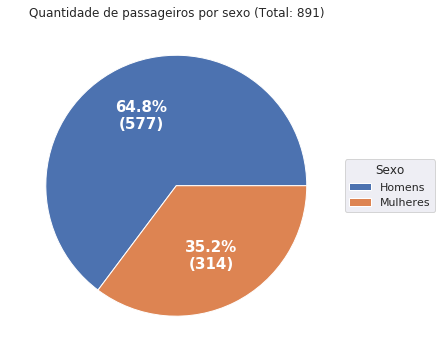

Diferença de 263 homens a mais que mulheres.


In [28]:
qtd_total = len(df);
qtd_homens = len(df.query('sexo == "homem"'));
qtd_mulheres = len(df.query('sexo == "mulher"'));

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

data = [qtd_homens, qtd_mulheres]
labels = ['Homens', 'Mulheres']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Sexo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)
         )

plt.setp(autotexts, size=15, weight="bold");

ax.set_title('Quantidade de passageiros por sexo' + ' (Total: ' + str(qtd_total) + ')');
plt.show();

print('Diferença de ' + str(qtd_homens-qtd_mulheres) + ' homens a mais que mulheres.');

Analise: Estavam a bordo 891 passageiros, 314 mulheres e 577 homens. Uma diferença grande, 263 homens a mais que mulheres.

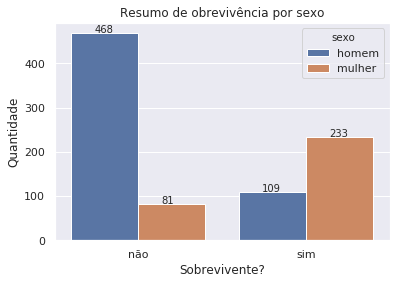

In [9]:
grafico = sns.countplot(data=df, x='sobrevivente', hue='sexo');
plt.title('Resumo de obrevivência por sexo');
plt.ylabel('Quantidade');
plt.xlabel('Sobrevivente?');
           
for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.06, posicao_topo.y1 + 1));

Analise: Identificado que a quantidade de homens a bordo era bem maior do que a de mulheres e mesmo assim sobreviveram mais mulheres do que homens.

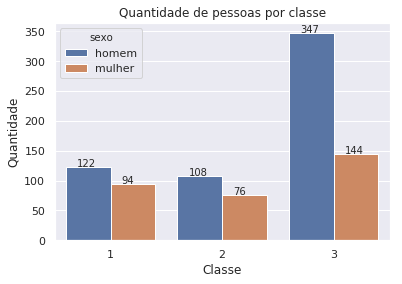

In [10]:
grafico = sns.countplot(x='classe', hue='sexo', data=df);
plt.title('Quantidade de pessoas por classe');
plt.ylabel('Quantidade');
plt.xlabel('Classe');

for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.1, posicao_topo.y1 + 1));

Analise: Identificado que a maioria dos homens e mulheres estavam na terceira classe e que a quantidade de homens na terceira classe era quase o triplo em relação as outras classes do navio.


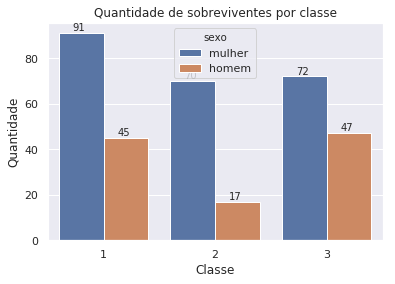

In [11]:
grafico = sns.countplot(x='classe', hue='sexo', data=df.query('sobrevivente == "sim"'));
plt.title('Quantidade de sobreviventes por classe');
plt.ylabel('Quantidade');
plt.xlabel('Classe');

for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.075, posicao_topo.y1 + 1));

Analise: Identificado que sobreviveram mais homens da primeira classe, porém esta classe possuía mais homens do que as outras classes.

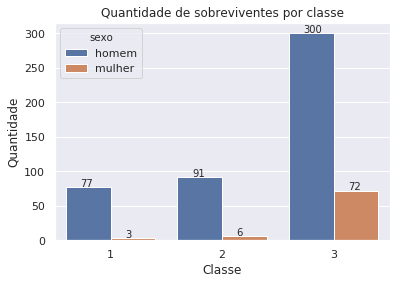

In [12]:
grafico = sns.countplot(x='classe', hue='sexo', data=df.query('sobrevivente == "não"'));
plt.title('Quantidade de sobreviventes por classe');
plt.ylabel('Quantidade');
plt.xlabel('Classe');

for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.07, posicao_topo.y1 + 1));

Analise: A quantidade de homens mortos da 3 classe foi mais de três vezes maior do que os da outras classes.

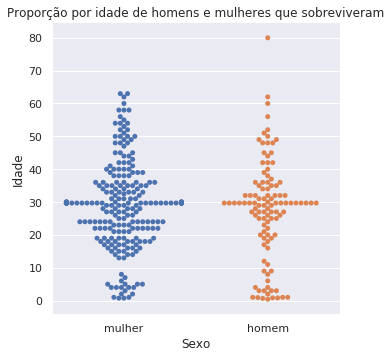

In [30]:
sns.catplot(x='sexo', y='idade', kind='swarm', data=df.query('sobrevivente == "sim"'));
plt.title('Proporção por idade de homens e mulheres que sobreviveram');
plt.ylabel('Idade');
plt.xlabel('Sexo');

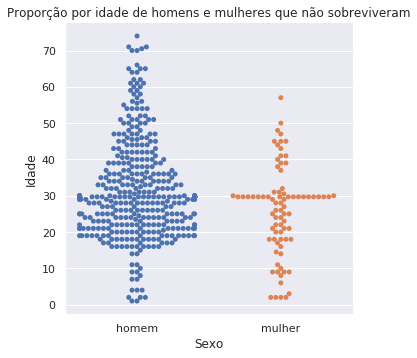

In [31]:
sns.catplot(x='sexo', y='idade', kind='swarm', data=df.query('sobrevivente == "não"'));
plt.title('Proporção por idade de homens e mulheres que não sobreviveram');
plt.ylabel('Idade');
plt.xlabel('Sexo');

Analise: Identificado visualmente que morreram muitas mulheres com 30 anos de idade e que a maior concentração de homens mortos foi entre 20 aos 30 anos de idade. Comparando com a proporção de sobreviventes, foi identificado um volume maior de sobreviventes "crianças".

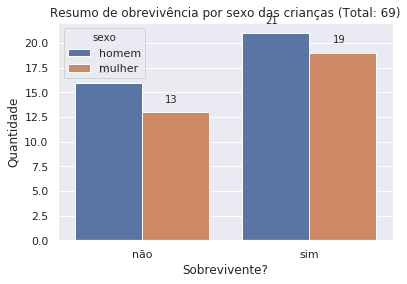

In [15]:
criancas = df.query('idade <= 12')

grafico = sns.countplot(data=criancas, x='sobrevivente', hue='sexo');
plt.title('Resumo de obrevivência por sexo das crianças (Total: ' + str(len(criancas)) + ')');
plt.ylabel('Quantidade');
plt.xlabel('Sobrevivente?');
           
for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.06, posicao_topo.y1 + 1));

Analise: Identificado que existiam 69 crianças (incluindo bebês e crianças até 12 anos de idade) e a diferença na sobrevivência não foi tão grande.

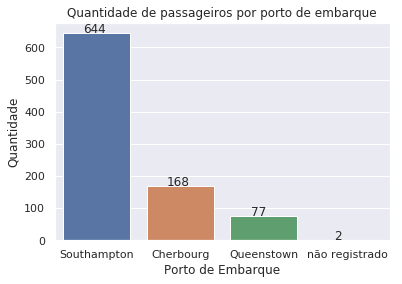

In [33]:
grafico = sns.countplot(data=df, x='porto_embarque');
plt.title('Quantidade de passageiros por porto de embarque')
plt.ylabel('Quantidade');
plt.xlabel('Porto de Embarque');
           
for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.16, posicao_topo.y1 + 1));
plt.show();

Analise: Identificado que a maioria dos passageiros embarcaram em Southampton e que 2 passageiros não tem registro de embarque.

In [130]:
df['tarifa_passageiro'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: tarifa_passageiro, dtype: float64

In [140]:
len(df.query('tarifa_passageiro == 0'))

15

Analise: Existiram 15 passageiros que não pagaram tarifa. A média foi de 32 da moeda da época. A diferença da maior tarifa para a média foi muito alta. Será que esses passageiros que pagaram mais caro sobreviveram?

In [37]:
df.query('tarifa_passageiro == "512.3292"')

,sobrevivente,classe,nome,sexo,idade,qtd_irmao_conjuge,qtd_pai_filho,bilhete,tarifa_passageiro,cabine,porto_embarque
id,,,,,,,,,,,
259,sim,1,"Ward, Miss. Anna",mulher,35.0,0,0,PC 17755,512.3292,não registrado,Cherbourg
680,sim,1,"Cardeza, Mr. Thomas Drake Martinez",homem,36.0,0,1,PC 17755,512.3292,B51 B53 B55,Cherbourg
738,sim,1,"Lesurer, Mr. Gustave J",homem,35.0,0,0,PC 17755,512.3292,B101,Cherbourg


Analise: Os 3 passageiros que pagaram as tarifas mais caras sobreviveram.

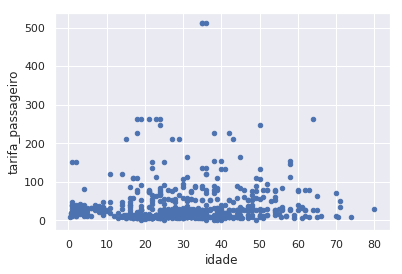

In [136]:
# Explorando mais dados.
df.plot(kind='scatter', x='idade', y='tarifa_passageiro');

- Conclusão

Apesar do arquivo não possuir os dados de todos os passageiros foi possivel levantar algumas conclusões não definitivas do naufrágio. Percebi que existia uma diferença grande entre homens e mulheres, sendo 263 homens a mais do que mulheres, e que sobreviveram 124 mulheres a mais que homens. A maior parte dos passageiros estavam na terceira classe, principalmente os homens. Infelizmente a terceira classe teve o maior índice de mortos, provavelmente pela localização das hospedagens e priorização nos botes. Identificado que existiu uma quantidade a maioria das mulheres tinham idade em torno dos 30 anos e que a maior parte dos falecidos homens tinha idade em torno de 20 a 30 anos.